<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cleaning-Bootstrapped-Data-and-Testing-Classifier-Algorithms" data-toc-modified-id="Cleaning-Bootstrapped-Data-and-Testing-Classifier-Algorithms-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cleaning Bootstrapped Data and Testing Classifier Algorithms</a></span><ul class="toc-item"><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#Linear-SVC" data-toc-modified-id="Linear-SVC-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Linear SVC</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Ada-Boost" data-toc-modified-id="Ada-Boost-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ada Boost</a></span></li><li><span><a href="#Evaluate-Misclassified-Sentences" data-toc-modified-id="Evaluate-Misclassified-Sentences-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Evaluate Misclassified Sentences</a></span></li></ul></li><li><span><a href="#Sentiment-Analysis" data-toc-modified-id="Sentiment-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sentiment Analysis</a></span><ul class="toc-item"><li><span><a href="#Using-TF-IDF-and-Classifiers" data-toc-modified-id="Using-TF-IDF-and-Classifiers-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Using TF-IDF and Classifiers</a></span></li></ul></li><li><span><a href="#Fullerton-Data" data-toc-modified-id="Fullerton-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fullerton Data</a></span><ul class="toc-item"><li><span><a href="#After-Processing" data-toc-modified-id="After-Processing-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>After Processing</a></span></li></ul></li><li><span><a href="#Comparison-of-Marina-Bay-Sands-and-Fullerton-Data" data-toc-modified-id="Comparison-of-Marina-Bay-Sands-and-Fullerton-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparison of Marina Bay Sands and Fullerton Data</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Recommendations</a></span></li></ul></div>

## Cleaning Bootstrapped Data and Testing Classifier Algorithms

In this section, we will attempt to analyse our prepared data using bag-of-words models. We will try:
1. Naive Bayes
2. Linear SVC
3. Random Forest
4. Adaboost

Bootstrapping was performed using the Random Forest Classifier presented here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import subjectivity
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [2]:
train1 = pd.read_csv('../datasets/annotated/train_2000_3000_210425.csv')
train2 = pd.read_csv('../datasets/annotated/train_3000_4000_210425.csv')
train3 = pd.read_csv('../datasets/annotated/train_5000_6000_210425.csv')
train4 = pd.read_csv('../datasets/annotated/train_0_1000_210425.csv')

In [3]:
def df_study(df):
    '''
    Function shows common information abotu dataframe
    '''
    display(df.shape)
    display(df.columns)
    display(df.dtypes)
    display(df.head(10))
    
def contains_mthen_2_words(s):
    '''
    Function returns True if given string has more than 2 words
    '''
    return len(str(s).split()) > 2

def remove_short_and_empty_sents(df):
    '''
    Function searches for and removes rows with empty content or content of 2 words and under.
    '''
    df.drop(index=df.loc[df['sent_text'] == ' ',:].index, inplace=True)
    df['to_drop'] = df['sent_text'].apply(lambda x: contains_mthen_2_words(x))
    df.drop(index=df.loc[df['to_drop'] == False,:].index, inplace=True)
    df.drop(columns=['to_drop'], inplace=True)
    
    
def reverse_map_categories(category_series):
    '''
    Function reverses category to number variable representation
    '''
    return category_series.map(inv_map_category)

In [4]:
df_study(train4)

(1000, 5)

Index(['Unnamed: 0', 'rev_id', 'sent_text', 'category', 'sentiment'], dtype='object')

Unnamed: 0     int64
rev_id         int64
sent_text     object
category      object
sentiment      int64
dtype: object

,Unnamed: 0,rev_id,sent_text,category,sentiment
0,0,691636950,We splurged on our last night in Singapore to ...,NaN,0
1,1,691636950,It's a beautiful building & linked to the Gard...,other,1
2,2,691636950,However it is very impersonal & very expensive...,service,-1
3,3,691636950,The room was huge (probably too big) and the s...,room,1
4,4,691636950,The furnishings re lovely & it does feel luxur...,room,1
5,5,691636950,We spent all day by the pool (1pm - 8pm) and e...,pool,1
6,6,691636950,But it is so busy and getting pool service was...,service,-1
7,7,691636950,My son then fell ill at 3am throwing up & diar...,NaN,-1
8,8,691636950,I put it down to being in,NaN,0
9,9,691610644,Located opposite of one iconic building in Sin...,NaN,0


In [5]:
train4.rename(columns={"Unnamed: 3": "category", "Unnamed: 0": "sent_id"}, inplace=True)

In [6]:
train4.set_index('sent_id', inplace=True)

In [7]:
df_study(train1)

(1000, 5)

Index(['Unnamed: 0', 'rev_id', 'sent_text', 'category', 'sentiment'], dtype='object')

Unnamed: 0      int64
rev_id          int64
sent_text      object
category       object
sentiment     float64
dtype: object

,Unnamed: 0,rev_id,sent_text,category,sentiment
0,2000,673847825,I was able to have a swim and take the photo b...,pool,-1.0
1,2001,673847825,The lobby was super busy and I found that a li...,others,-1.0
2,2002,673847825,"But once I got to my room, it was very peaceful.",room,1.0
3,2003,673847825,I'm glad I stayed here but not sure that I wou...,NaN,1.0
4,2004,673838523,"The hotel is amazingly stunning, from when you...",NaN,1.0
5,2005,673838523,This is a must stay even for most one night to...,pool,1.0
6,2006,673838523,We had a view of the gardens by the bay and wh...,other,1.0
7,2007,673600522,Marina Bay Sands totally is the best part of S...,other,1.0
8,2008,673600522,"The hotel the science museum , garden by the b...",other,0.0
9,2009,673600522,I think if you want to visit Singapore you sho...,NaN,1.0


In [8]:
train1.rename(columns={"Unnamed: 3": "category", "Unnamed: 0": "sent_id"}, inplace=True)

In [9]:
train1.set_index('sent_id', inplace=True)

In [10]:
df_study(train2)

(889, 5)

Index(['Unnamed: 0', 'rev_id', 'sent_text', 'category', 'sentiment'], dtype='object')

Unnamed: 0     int64
rev_id         int64
sent_text     object
category      object
sentiment      int64
dtype: object

,Unnamed: 0,rev_id,sent_text,category,sentiment
0,3000,668105871,The view was breathtaking.,room,1
1,3001,668105871,Spagoo breakfast was delicious.,food,1
2,3003,668105871,The room is so spacious with complete premium ...,room,1
3,3004,668066471,As seasoned travellers we have visited many ho...,NaN,1
4,3005,668066471,On arrival our hotel voucher was checked and w...,service,0
5,3006,668066471,We stayed on the 7th floor which you would thi...,room,0
6,3007,668066471,The rooms are amazing - automatic opening of t...,room,1
7,3008,668066471,Lifts were efficient (only to be expected) and...,others,1
8,3009,668066471,Needing your room card - one for,NaN,0
9,3010,668025280,One of the best hotel in the world is Marina b...,food,1


In [11]:
train2.rename(columns={"Unnamed: 0": "sent_id"}, inplace=True)
train2.set_index('sent_id', inplace=True)

In [12]:
df_study(train3)

(843, 5)

Index(['Unnamed: 0', 'rev_id', 'sent_text', 'category', 'sentiment'], dtype='object')

Unnamed: 0     int64
rev_id         int64
sent_text     object
category      object
sentiment      int64
dtype: object

,Unnamed: 0,rev_id,sent_text,category,sentiment
0,5000,655152325,"Received exactly what we booked, good sized ro...",room,1
1,5001,655152325,Bed is rock hard.,room,-1
2,5002,655152325,"Pillows are very good, but the bed kills your ...",room,-1
3,5003,655152325,"You are a number only at this hotel, it is a g...",service,-1
4,5004,655152325,We booked to use the club lounge and this was ...,service,1
5,5005,655152325,The club is large but it needs to be as many g...,service,0
6,5006,655152325,"It has no feeling of exclusiveness, once full ...",food,-1
7,5007,655152325,"There are kids everywhere, no control with the...",food,-1
8,5008,655152325,This was at multiple tables.,NaN,0
9,5009,655152325,Evening drinks should be drinks and,food,0


In [13]:
train3.rename(columns={"Unnamed: 0": "sent_id"}, inplace=True)
train3.set_index('sent_id', inplace=True)

In [14]:
remove_short_and_empty_sents(train1)
remove_short_and_empty_sents(train2)
remove_short_and_empty_sents(train3)
remove_short_and_empty_sents(train4)

In [15]:
train4['category'].value_counts()

room       149
service    116
pool       102
food        81
others      74
other        1
Name: category, dtype: int64

In [16]:
train4['category'].replace({'others': 'other'}, inplace=True)

In [17]:
train4['category'].fillna('none', inplace=True)

In [18]:
train1['category'].fillna('none', inplace=True)

In [19]:
train1['category'].value_counts()

none       279
service    157
room       126
pool       117
food        77
other       75
others      11
Name: category, dtype: int64

In [20]:
train1['category'].replace({'others': 'other'}, inplace=True)

In [21]:
train2['category'].value_counts()

room        134
service     132
others       97
pool         85
food         81
servivce      1
othes         1
Name: category, dtype: int64

In [22]:
train2['category'].replace({'others': 'other', 'servivce': 'service', 'othes': 'other'}, inplace=True)

In [23]:
train3['category'].value_counts()

room       132
service    122
pool       118
food        86
others      69
other        1
             1
Name: category, dtype: int64

In [24]:
train3['category'].replace({'others': 'other'}, inplace=True)

In [25]:
train2['category'].fillna('none', inplace=True)
train3['category'].fillna('none', inplace=True)

In [26]:
df = pd.concat([train1, train2, train3, train4], ignore_index=True)

In [27]:
df_study(df)

(3395, 4)

Index(['rev_id', 'sent_text', 'category', 'sentiment'], dtype='object')

rev_id         int64
sent_text     object
category      object
sentiment    float64
dtype: object

,rev_id,sent_text,category,sentiment
0,673847825,I was able to have a swim and take the photo b...,pool,-1.0
1,673847825,The lobby was super busy and I found that a li...,other,-1.0
2,673847825,"But once I got to my room, it was very peaceful.",room,1.0
3,673847825,I'm glad I stayed here but not sure that I wou...,none,1.0
4,673838523,"The hotel is amazingly stunning, from when you...",none,1.0
5,673838523,This is a must stay even for most one night to...,pool,1.0
6,673838523,We had a view of the gardens by the bay and wh...,other,1.0
7,673600522,Marina Bay Sands totally is the best part of S...,other,1.0
8,673600522,"The hotel the science museum , garden by the b...",other,0.0
9,673600522,I think if you want to visit Singapore you sho...,none,1.0


In [28]:
# Our lemmatizing and stemmatizing function

import nltk
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords, wordnet # Import the stopword list
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

def nltk2wn_tag(nltk_tag):
    '''
    Function matches a tokenized word with its tag for more accurate lemmatization.
    Returns word's tag.
    '''
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:                    
        return None

def convert_words(data_text):
    '''
    Function takes a text and either lemmatizes its content.
    Returns a string of tokens if a token is not a stopword.
    '''
    nltk_tagged = pos_tag(tokenizer.tokenize(data_text.lower()))
    wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
    res_words = []
    for word, tag in wn_tagged:
        if tag is None:                        
            res_words.append(word)
        else:
            res_words.append(lemmatizer.lemmatize(word, tag))
    return " ".join([word for word in res_words if word not in set(stopwords.words('english'))])

In [29]:
df['sent_text_mod'] = df['sent_text'].map(lambda x: convert_words(x)) 

In [30]:
df['category'].fillna('none', inplace=True)

In [31]:
df['category'].value_counts()

none       1249
room        541
service     528
pool        422
other       329
food        325
              1
Name: category, dtype: int64

In [32]:
df['category'].replace({'others': 'other'}, inplace=True)

In [33]:
df['category'].replace({'  ': 'none'}, inplace=True)

In [34]:
df['category'].value_counts()

none       1250
room        541
service     528
pool        422
other       329
food        325
Name: category, dtype: int64

In [35]:
map_category = {
    'none': 0,
    'service': 1,
    'room': 2,
    'pool': 3,
    'food': 4,
    'other': 5
}

In [36]:
df['category_mod'] = df['category'].map(map_category)

In [37]:
df['category_mod'].isna().sum()

0

In [38]:
def get_gs_info(gs, X_test, y_test):
    '''
    Function prints and creates heatmap of important model metrics
    '''
    print(f'Best Estimator: \n')
    display(gs.best_estimator_)
    y_pred = gs.predict(X_test)
    print(f"F1 Score (Micro): {f1_score(y_test, y_pred, average='micro')}")
    print(f"F1 Score (Macro): {f1_score(y_test, y_pred, average='macro')}")
    print(f"Precision Score (Micro) {precision_score(y_test, y_pred, average='micro')}")
    print(f"Precision Score (Macro) {precision_score(y_test, y_pred, average='macro')}")
    print(f"Recall Score (Micro) {recall_score(y_test, y_pred, average='micro')}")
    print(f"Recall Score (Macro) {recall_score(y_test, y_pred, average='macro')}")
    conf_mat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm',
                xticklabels=list(map_category.keys()), yticklabels=map_category.keys(), annot_kws={'size':16})
    plt.ylabel('Actual', fontsize=20)
    plt.xlabel('Predicted', fontsize=20)
    plt.tick_params(labelsize=20)
    plt.show()

### Naive Bayes

In [39]:
X = df['sent_text_mod']
y = df['category_mod']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=.25,
                                                    random_state = 42,
                                                   stratify=y)

In [41]:
y_train.shape

(2546,)

In [42]:
pipe = Pipeline([
    ('vector', TfidfVectorizer(ngram_range=(1,3), stop_words='english')),
    ('nb', MultinomialNB()),
])

In [43]:
pipe_params = {
    'vector__max_features': [500, 750, 1000],
    'vector__min_df': [4, 5, 6],
    'vector__max_df': [.4, .45, .5],
    'nb__alpha': [.4, .5, .6]
}

In [44]:
gs = GridSearchCV(pipe, 
                  pipe_params,
                  cv=5,
                  n_jobs=-1,
                 )

In [45]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vector',
                                        TfidfVectorizer(ngram_range=(1, 3),
                                                        stop_words='english')),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': [0.4, 0.5, 0.6],
                         'vector__max_df': [0.4, 0.45, 0.5],
                         'vector__max_features': [500, 750, 1000],
                         'vector__min_df': [4, 5, 6]})

Best Estimator: 



Pipeline(steps=[('vector',
                 TfidfVectorizer(max_df=0.4, max_features=750, min_df=5,
                                 ngram_range=(1, 3), stop_words='english')),
                ('nb', MultinomialNB(alpha=0.5))])

F1 Score (Micro): 0.7385159010600707
F1 Score (Macro): 0.7158993923881479
Precision Score (Micro) 0.7385159010600707
Precision Score (Macro) 0.7745201189057491
Recall Score (Micro) 0.7385159010600707
Recall Score (Macro) 0.6839941785505103


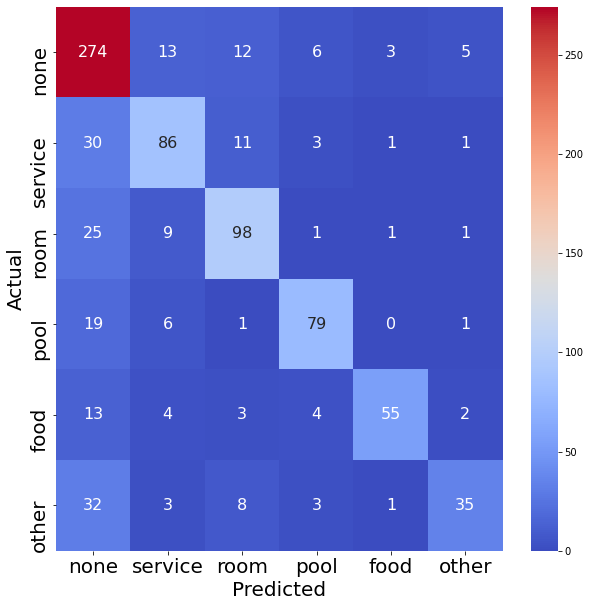

In [46]:
get_gs_info(gs, X_test, y_test)

### Linear SVC

In [47]:
pipe_svc = Pipeline([
    ('vector', TfidfVectorizer(ngram_range=(1,3), stop_words='english')),
    ('svc', SVC(kernel='linear', gamma='auto')),
])

In [48]:
pipe_params_svc = {
    'vector__max_features': [500, 750, 1000],
    'vector__min_df': [4, 5, 6],
    'vector__max_df': [.3, .35, .4],
    'svc__C': [.8, .9, 1.0],
    'svc__degree': [3],
    'svc__gamma': [.0001, .001, .01],
}

In [49]:
gs_svc = GridSearchCV(pipe_svc, 
                  pipe_params_svc,
                  cv=5,
                  n_jobs=-1,
                 )

In [50]:
gs_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vector',
                                        TfidfVectorizer(ngram_range=(1, 3),
                                                        stop_words='english')),
                                       ('svc',
                                        SVC(gamma='auto', kernel='linear'))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.8, 0.9, 1.0], 'svc__degree': [3],
                         'svc__gamma': [0.0001, 0.001, 0.01],
                         'vector__max_df': [0.3, 0.35, 0.4],
                         'vector__max_features': [500, 750, 1000],
                         'vector__min_df': [4, 5, 6]})

In [51]:
map_category.keys()

dict_keys(['none', 'service', 'room', 'pool', 'food', 'other'])

Best Estimator: 



Pipeline(steps=[('vector',
                 TfidfVectorizer(max_df=0.3, max_features=750, min_df=5,
                                 ngram_range=(1, 3), stop_words='english')),
                ('svc', SVC(C=0.9, gamma=0.0001, kernel='linear'))])

F1 Score (Micro): 0.7985865724381626
F1 Score (Macro): 0.7863356809225196
Precision Score (Micro) 0.7985865724381626
Precision Score (Macro) 0.8225593477974998
Recall Score (Micro) 0.7985865724381626
Recall Score (Macro) 0.7621935601991728


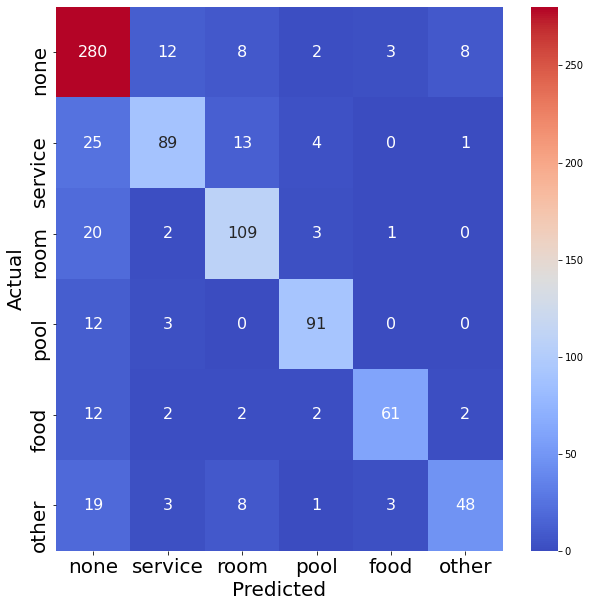

In [52]:
get_gs_info(gs_svc, X_test, y_test)

### Random Forest

In [53]:
pipe_rf = Pipeline([
    ('vector', TfidfVectorizer(ngram_range=(1,3), stop_words='english')),
    ('rf', RandomForestClassifier(class_weight = 'balanced')),
])

In [54]:
pipe_params_rf = {
    'vector__max_features': [1750, 2000, 2250],
    'vector__min_df': [1, 2,3],
    'vector__max_df': [.25, .3, .35],
    'rf__n_estimators': [120, 140, 160],
    'rf__max_depth':[8],
}

In [55]:
gs_rf = GridSearchCV(pipe_rf, 
                  pipe_params_rf,
                  cv=5,
                  n_jobs=-1,
                 )

In [56]:
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vector',
                                        TfidfVectorizer(ngram_range=(1, 3),
                                                        stop_words='english')),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [8],
                         'rf__n_estimators': [120, 140, 160],
                         'vector__max_df': [0.25, 0.3, 0.35],
                         'vector__max_features': [1750, 2000, 2250],
                         'vector__min_df': [1, 2, 3]})

Best Estimator: 



Pipeline(steps=[('vector',
                 TfidfVectorizer(max_df=0.3, max_features=2250,
                                 ngram_range=(1, 3), stop_words='english')),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=8,
                                        n_estimators=160))])

F1 Score (Micro): 0.7809187279151943
F1 Score (Macro): 0.7694538447844951
Precision Score (Micro) 0.7809187279151943
Precision Score (Macro) 0.7904663105454101
Recall Score (Micro) 0.7809187279151943
Recall Score (Macro) 0.7562120956241011


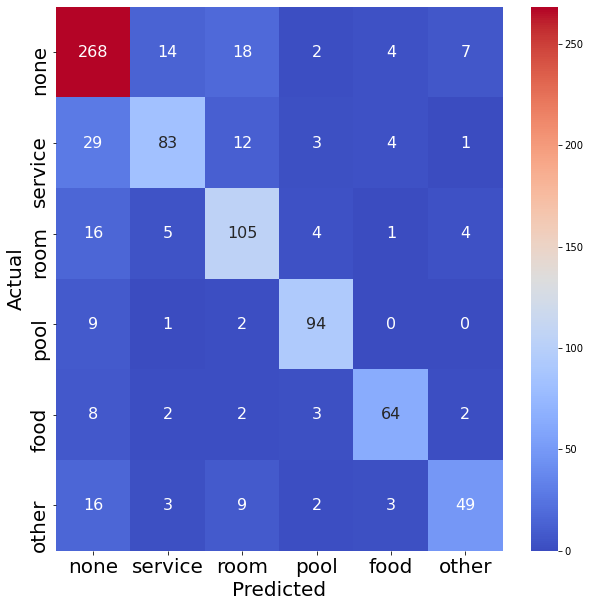

In [57]:
get_gs_info(gs_rf, X_test, y_test)

### Ada Boost

In [58]:
pipe_ada = Pipeline([
    ('vector', TfidfVectorizer(ngram_range=(1,3), stop_words='english')),
    ('ada', AdaBoostClassifier()),
])

In [59]:
pipe_params_ada = {
    'vector__max_features': [2250, 2500, 2750, 3000, 3520],
    'vector__min_df': [1, 2, 3],
    'vector__max_df': [.65, .7, .75],
    'ada__learning_rate': [.7, .8, .9],
    'ada__n_estimators': [80, 90, 100],
    }

In [60]:
gs_ada = GridSearchCV(pipe_ada, 
                  pipe_params_ada,
                  cv=5,
                  n_jobs=-1,
                 )

In [61]:
gs_ada.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vector',
                                        TfidfVectorizer(ngram_range=(1, 3),
                                                        stop_words='english')),
                                       ('ada', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [0.7, 0.8, 0.9],
                         'ada__n_estimators': [80, 90, 100],
                         'vector__max_df': [0.65, 0.7, 0.75],
                         'vector__max_features': [2250, 2500, 2750, 3000, 3520],
                         'vector__min_df': [1, 2, 3]})

Best Estimator: 



Pipeline(steps=[('vector',
                 TfidfVectorizer(max_df=0.65, max_features=2750,
                                 ngram_range=(1, 3), stop_words='english')),
                ('ada',
                 AdaBoostClassifier(learning_rate=0.8, n_estimators=90))])

F1 Score (Micro): 0.7491166077738517
F1 Score (Macro): 0.7049352964725636
Precision Score (Micro) 0.7491166077738516
Precision Score (Macro) 0.765965818310248
Recall Score (Micro) 0.7491166077738516
Recall Score (Macro) 0.6800060980371758


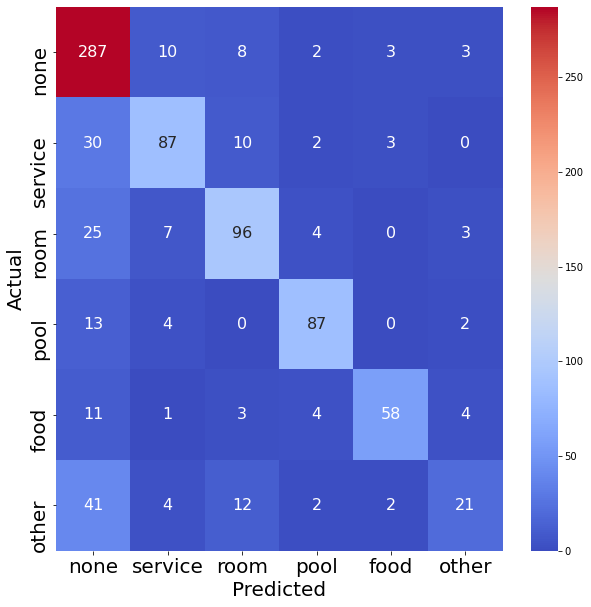

In [62]:
get_gs_info(gs_ada, X_test, y_test)

### Evaluate Misclassified Sentences

We will evaluate our misclassified sentences from our Random Forest Classifier.

In [63]:
df_rf = pd.DataFrame(index=X_test.index, data=X_test)

In [64]:
df_rf['category'] = y_test
df_rf['preds'] = gs_rf.predict(X_test)

In [65]:
df_rf_incorrect = df_rf.loc[df_rf['category'] != df_rf['preds']]

In [66]:
inv_map_category = {v: k for k, v in map_category.items()}

In [67]:
inv_map_category

{0: 'none', 1: 'service', 2: 'room', 3: 'pool', 4: 'food', 5: 'other'}

In [68]:
df_rf_incorrect

,sent_text_mod,category,preds
994,one thing highlight could able marina bay ligh...,0,2
1977,go observation deck price step bar,5,4
379,get cheap room possible,0,2
1951,offer free wheelchair helpful,0,1
2505,bath tub amaze,2,0
...,...,...,...
1360,really ought lift hotel guest,5,0
2401,definitely take walk around hotel outside look...,0,5
400,flight leave singapore late night able store l...,1,2
1206,view breathtaking also two jacuzzi relax,3,2


In [69]:
df_rf_incorrect['category'] = reverse_map_categories(df_rf_incorrect['category'])
df_rf_incorrect['preds'] = reverse_map_categories(df_rf_incorrect['preds'])

<ipython-input-69-488de1a656e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_incorrect['category'] = reverse_map_categories(df_rf_incorrect['category'])
<ipython-input-69-488de1a656e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf_incorrect['preds'] = reverse_map_categories(df_rf_incorrect['preds'])


In [70]:
df_rf_incorrect

,sent_text_mod,category,preds
994,one thing highlight could able marina bay ligh...,none,room
1977,go observation deck price step bar,other,food
379,get cheap room possible,none,room
1951,offer free wheelchair helpful,none,service
2505,bath tub amaze,room,none
...,...,...,...
1360,really ought lift hotel guest,other,none
2401,definitely take walk around hotel outside look...,none,other
400,flight leave singapore late night able store l...,service,room
1206,view breathtaking also two jacuzzi relax,pool,room


In [72]:
df_rf_incorrect.to_csv('../datasets/review/gs_rf_incorrect.csv')

**Upon Analysis**: Unfortunately, there was not an obvious pattern for incorrectly predicted data. The one most obvious creator of mispredicted data were spelling mistakes/typoes which threw the classifier off. Other than that, it appears that the classifier simply required more data to function optimally. This was an observation from boolegging as well, as a larger train set produced more and more accurate category predictions.

## Sentiment Analysis

For Sentiment Analysis, we compared:
1. Pre-trained NLTK VADER
2. Pre-trained TextBlob

With  
3. Random Forest

As the benchmark.

In [73]:
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob

In [74]:
X_sent = df['sent_text']
y_sent = df['sentiment']
sid = SentimentIntensityAnalyzer()

In [75]:
df['sentiment'].value_counts()

 1.0    1858
 0.0    1117
-1.0     404
 6.0       1
Name: sentiment, dtype: int64

In [76]:
df.loc[df['sentiment'] == 6.0, 'sentiment'] = 1.0

In [77]:
for index, row in df.iterrows():
    ss = sid.polarity_scores(row['sent_text'])
    ss2 = sid.polarity_scores(row['sent_text_mod'])

    if ss['compound'] > 0.0:
        df.loc[index, 'sentiment_pred_vader'] = 1
    elif ss['compound'] == 0.0 :
        df.loc[index, 'sentiment_pred_vader'] = 0
    elif ss['compound'] < 0.0:
        df.loc[index, 'sentiment_pred_vader'] = -1
        
    if ss2['compound'] > 0.0:
        df.loc[index, 'sentiment_pred_vader_token'] = 1
    elif ss2['compound'] == 0.0 :
        df.loc[index, 'sentiment_pred_vader_token'] = 0
    elif ss2['compound'] < 0.0:
        df.loc[index, 'sentiment_pred_vader_token'] = -1

matches = matches_token = 0
for index, row in df.iterrows():
    if row['sentiment'] == row['sentiment_pred_vader']:
        matches += 1
    if row['sentiment'] == row['sentiment_pred_vader_token']:
        matches_token += 1
        
sentiment_score_untokenized = matches/len(df) 
sentiment_score_tokenized = matches_token/len(df) 
print(f'VADER Sentiment Score Untokenized: {sentiment_score_untokenized}')
print(f'VADER Sentiment Score Tokenized: {sentiment_score_tokenized}')

VADER Sentiment Score Untokenized: 0.759941089837997
VADER Sentiment Score Tokenized: 0.727540500736377


In [78]:
for index, row in df.iterrows():
    blob = TextBlob(row['sent_text'])
    blob_token = TextBlob(row['sent_text_mod'])
    
    if blob.sentiment[0] > 0:
        df.loc[index, 'sentiment_pred_textblob'] = 1
    elif blob.sentiment[0] == 0:
        df.loc[index, 'sentiment_pred_textblob'] = 0
    elif blob.sentiment[0] < 0:
        df.loc[index, 'sentiment_pred_textblob'] = -1
        
    if blob_token.sentiment[0] > 0:
        df.loc[index, 'sentiment_pred_textblob_token'] = 1
    elif blob_token.sentiment[0] == 0:
        df.loc[index, 'sentiment_pred_textblob_token'] = 0
    elif blob_token.sentiment[0] < 0:
        df.loc[index, 'sentiment_pred_textblob_token'] = -1
        

matches = matches_token = 0
for index, row in df.iterrows():
    if row['sentiment'] == row['sentiment_pred_textblob']:
        matches += 1
    if row['sentiment'] == row['sentiment_pred_textblob_token']:
        matches_token += 1
        
sentiment_score_untokenized = matches/len(df) 
sentiment_score_tokenized = matches_token/len(df) 
print(f'TextBlob Sentiment Score Untokenized: {sentiment_score_untokenized}')
print(f'TextBlob Sentiment Score Tokenized: {sentiment_score_tokenized}')

TextBlob Sentiment Score Untokenized: 0.6703976435935198
TextBlob Sentiment Score Tokenized: 0.646539027982327


How well do each of the pre-trained algorithms do in comparison to the annotated results?

In [79]:
def create_comparison_plot_df(df, result_name, pred_name, pred2_name):
    df_sentiment = pd.DataFrame()
    for index, row in df.iterrows():
        df_sentiment.loc[index, 'type'] = df[result_name].name
        df_sentiment.loc[index, 'result'] = row[result_name]
        
    for index, row in df.iterrows():
        df_sentiment.loc[index+len(df), 'type'] = df[pred_name].name
        df_sentiment.loc[index+len(df), 'result'] = row[pred_name]
    
    for index, row in df.iterrows():
        df_sentiment.loc[index+len(df)+len(df), 'type'] = df[pred2_name].name
        df_sentiment.loc[index+len(df)+len(df), 'result'] = row[pred2_name]
        
    return df_sentiment

In [80]:
vader_sent_df = create_comparison_plot_df(df, 'sentiment', 'sentiment_pred_vader', 'sentiment_pred_textblob')

Text(0, 0.5, 'Sentiment')

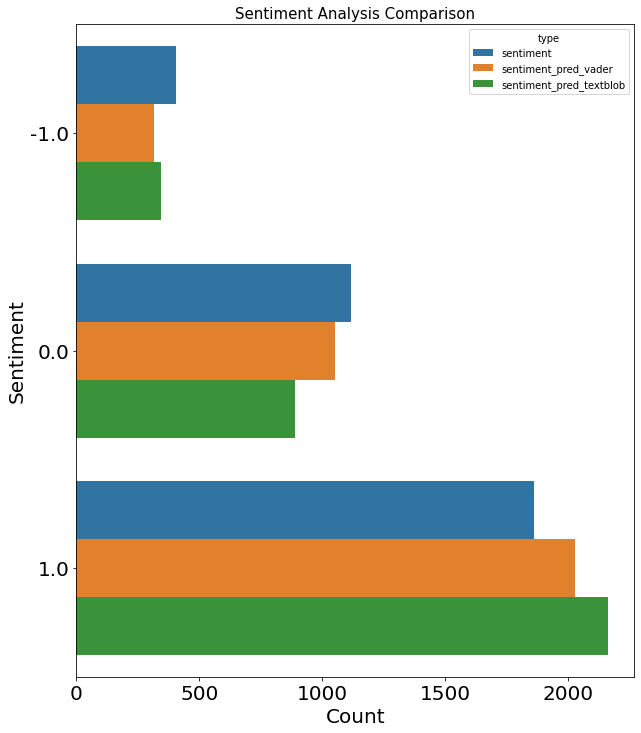

In [81]:
plt.figure(figsize=(10,12))
ax = sns.countplot(y="result", hue="type", data=vader_sent_df)
ax.tick_params(labelsize=20)
ax.set_title("Sentiment Analysis Comparison",fontsize=15)
ax.set_xlabel("Count",fontsize=20)
ax.set_ylabel("Sentiment",fontsize=20)

From the above graph, we see that both VADER and Textblob predicted more positive results (1.0) than the other two classes. This is understandable as positive is the majority class. That said, the results are not very different.

Can we adjust VADER to predict the scores more accurately? Let's take a look at what mistakes are common and if we may fix them through a rules-matching approach

In [84]:
df.loc[(df['sentiment'] != df['sentiment_pred_vader']), ['sent_text', 'sentiment', 'sentiment_pred_vader']].to_csv('../datasets/review/df_sentiment.csv')

Again, no obvious patterns for mis-predicted rows could be found.

### Using TF-IDF and Classifiers

In [90]:
df['sentiment'].isna().sum()

0

In [91]:
df.dropna(subset=['sentiment'], inplace=True)

In [92]:
X = df['sent_text_mod']
y = df['sentiment']

In [93]:
X_train_sent, X_test_sent, y_train_sent, y_test_sent = train_test_split(X, y,
                                                   test_size=.25,
                                                    random_state = 42,
                                                   stratify=y)

In [94]:
pipe_params_rf_sent = {
    'vector__max_features': [2250, 2500, 2750],
    'vector__min_df': [1, 2, 3],
    'vector__max_df': [.25, .3, .35],
    'rf__n_estimators': [120, 140, 160],
    'rf__max_depth':[7],
}

In [95]:
gs_rf_sent = GridSearchCV(pipe_rf, 
                  pipe_params_rf_sent,
                  cv=5,
                  n_jobs=-1,
                 )

In [96]:
gs_rf_sent.fit(X_train_sent, y_train_sent)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vector',
                                        TfidfVectorizer(ngram_range=(1, 3),
                                                        stop_words='english')),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [7],
                         'rf__n_estimators': [120, 140, 160],
                         'vector__max_df': [0.25, 0.3, 0.35],
                         'vector__max_features': [2250, 2500, 2750],
                         'vector__min_df': [1, 2, 3]})

In [97]:
def get_gs_info_sent(gs, X_test, y_test):
    '''
    Function prints and creates heatmap of important model metrics
    '''
    print(f'Best Estimator: \n')
    display(gs.best_estimator_)
    y_pred = gs.predict(X_test)
    print(f"F1 Score (Micro): {f1_score(y_test, y_pred, average='micro')}")
    print(f"F1 Score (Macro): {f1_score(y_test, y_pred, average='macro')}")
    print(f"Precision Score (Micro) {precision_score(y_test, y_pred, average='micro')}")
    print(f"Precision Score (Macro) {precision_score(y_test, y_pred, average='macro')}")
    print(f"Recall Score (Micro) {recall_score(y_test, y_pred, average='micro')}")
    print(f"Recall Score (Macro) {recall_score(y_test, y_pred, average='macro')}")
    conf_mat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm',
                xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1], annot_kws={'size':16})
    plt.ylabel('Actual', fontsize=20)
    plt.xlabel('Predicted', fontsize=20)
    plt.tick_params(labelsize=20)
    plt.show()

Best Estimator: 



Pipeline(steps=[('vector',
                 TfidfVectorizer(max_df=0.25, max_features=2750,
                                 ngram_range=(1, 3), stop_words='english')),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=7,
                                        n_estimators=160))])

F1 Score (Micro): 0.5976331360946746
F1 Score (Macro): 0.55038258689637
Precision Score (Micro) 0.5976331360946746
Precision Score (Macro) 0.5595467079864486
Recall Score (Micro) 0.5976331360946746
Recall Score (Macro) 0.5703041271869123


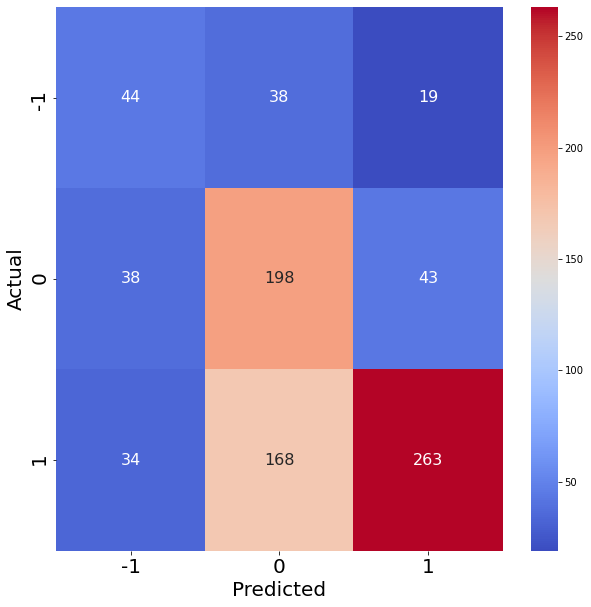

In [98]:
get_gs_info_sent(gs_rf_sent, X_test_sent, y_test_sent)

The model performs much worse than the pre-trained algorithms. This was expected given the general nature of sentiment (positive and negative sentiment in all context will share a similar but broad vocabulary. That said, performance is expected to improve with more data provided.

## Fullerton Data

Using our MBS models, we will bootstrap annotate and then subsequently predict our annotated Fullerton data on our MBS trained models Linear SVC and Random Forest models.

In [99]:
full_df = pd.read_csv('../datasets/sentencized/test_df_210426.csv')

In [100]:
full_df

,Unnamed: 0,rev_id,sent_text,objects,descriptive,vader_neg,vader_neu,vader_pos,vader_comp,category,sentiment,batch_date
0,0,689620611,Our suite overlooked the Singapore River and s...,"suite, River, we, views",amazing,0.073,0.659,0.268,0.6077,NaN,1.0,210426
1,1,689620611,Its located within easy walk of many attractio...,"walk, attractions, others, Island","easy, many, worst",0.153,0.634,0.213,0.1531,NaN,1.0,210426
2,2,689620611,Our check-in was swift and friendly.,check,"swift, friendly",0.000,0.444,0.556,0.6124,NaN,1.0,210426
3,3,689620611,Staff were welcoming at all times and most spo...,"Staff, times, English, us",most,0.000,0.642,0.358,0.8104,NaN,1.0,210426
4,4,689620611,Breakfast was of high caliber and of considera...,"Breakfast, caliber, variety","high, considerable",0.000,1.000,0.000,0.0000,NaN,0.0,210426
...,...,...,...,...,...,...,...,...,...,...,...,...
3001,3001,660976489,Service was superb at all touch points as wel...,"Service, points",superb,0.000,0.530,0.470,0.7351,NaN,1.0,210426
3002,3002,660976489,We will definitely stay at the Fullerton,"We, Fullerton",NaN,0.000,0.690,0.310,0.4019,NaN,1.0,210426
3003,3003,660929915,"From precheck in welcoming email, our stay at...","precheck, email, , stay, hotel, nothing, staf...","beautiful, too much, relaxed",0.000,0.783,0.217,0.8750,NaN,1.0,210426
3004,3004,660929915,Very very comfortable beds felt like I was sle...,"beds, I, cloud, flight, delays, this","Very very comfortable, long, welcome",0.000,0.615,0.385,0.8545,NaN,1.0,210426


In [101]:
full_df.rename(columns={"Unnamed: 3": "category", "Unnamed: 0": "sent_id"}, inplace=True)

In [102]:
full_df.set_index('sent_id', inplace=True)

In [103]:
remove_short_and_empty_sents(full_df)

In [104]:
df_study(full_df)

(2603, 11)

Index(['rev_id', 'sent_text', 'objects', 'descriptive', 'vader_neg',
       'vader_neu', 'vader_pos', 'vader_comp', 'category', 'sentiment',
       'batch_date'],
      dtype='object')

rev_id           int64
sent_text       object
objects         object
descriptive     object
vader_neg      float64
vader_neu      float64
vader_pos      float64
vader_comp     float64
category       float64
sentiment      float64
batch_date       int64
dtype: object

,rev_id,sent_text,objects,descriptive,vader_neg,vader_neu,vader_pos,vader_comp,category,sentiment,batch_date
sent_id,,,,,,,,,,,
0,689620611,Our suite overlooked the Singapore River and s...,"suite, River, we, views",amazing,0.073,0.659,0.268,0.6077,NaN,1.0,210426
1,689620611,Its located within easy walk of many attractio...,"walk, attractions, others, Island","easy, many, worst",0.153,0.634,0.213,0.1531,NaN,1.0,210426
2,689620611,Our check-in was swift and friendly.,check,"swift, friendly",0.000,0.444,0.556,0.6124,NaN,1.0,210426
3,689620611,Staff were welcoming at all times and most spo...,"Staff, times, English, us",most,0.000,0.642,0.358,0.8104,NaN,1.0,210426
4,689620611,Breakfast was of high caliber and of considera...,"Breakfast, caliber, variety","high, considerable",0.000,1.000,0.000,0.0000,NaN,0.0,210426
5,689620611,Our suite was of high standard in cleanliness ...,"suite, standard, cleanliness",high,0.000,1.000,0.000,0.0000,NaN,0.0,210426
6,689620611,Planning to bring the family here next year an...,"family, most, establishment","next, most",0.000,0.842,0.158,0.4576,NaN,1.0,210426
7,689620611,Highly Recommend this hotel.,hotel,NaN,0.000,0.518,0.482,0.4201,NaN,1.0,210426
8,689494350,Thank you Giri and Ian for this experience at ...,"you, experience, Bar, Hotel",NaN,0.000,0.857,0.143,0.3612,NaN,1.0,210426


In [105]:
full_df['sent_text_mod'] = full_df['sent_text'].map(lambda x: convert_words(x)) 

In [106]:
X_full = full_df['sent_text_mod']

In [107]:
full_df['category'] = gs_rf.best_estimator_.predict(X_full)

In [108]:
full_df['category'] = reverse_map_categories(full_df['category'])

In [109]:
full_df.columns

Index(['rev_id', 'sent_text', 'objects', 'descriptive', 'vader_neg',
       'vader_neu', 'vader_pos', 'vader_comp', 'category', 'sentiment',
       'batch_date', 'sent_text_mod'],
      dtype='object')

In [110]:
# full_df[['rev_id', 'sent_text', 'category', 'sentiment']].to_csv('../prepped_data/full_data_210426.csv')

### After Processing

**Evaluation of Fullerton Data**

The Fullerton data was generally a lot more positive than MBS data, with a lot of praise for individual service members. There was also a large proportion of reviews focused fully on food, and mentioning individual menu items as well. Let us see how our model trained on only MBS data performs on Fullerton data.

In [111]:
full_train = pd.read_csv('../datasets/annotated/full_data_210427.csv')

In [112]:
full_train = full_train[:1100]

In [113]:
full_train.isna().sum()

sent_id        0
rev_id         0
sent_text      0
category     332
sentiment      0
dtype: int64

In [114]:
full_train['category'].fillna('none', inplace=True)

In [115]:
full_train['category'].replace({'others': 'other'}, inplace=True)

In [116]:
full_train['category']

0          room
1         other
2       service
3       service
4          food
         ...   
1094       none
1095       food
1096    service
1097    service
1098    service
Name: category, Length: 1099, dtype: object

In [117]:
full_train['category_mod'] = full_train['category'].map(map_category)

In [118]:
full_train['category_mod']

0       2
1       5
2       1
3       1
4       4
       ..
1094    0
1095    4
1096    1
1097    1
1098    1
Name: category_mod, Length: 1099, dtype: int64

In [119]:
X_full = full_train['category_mod']

In [120]:
full_train['sent_text_mod'] = full_train['sent_text'].map(lambda x: convert_words(x)) 

Best Estimator: 



Pipeline(steps=[('vector',
                 TfidfVectorizer(max_df=0.3, max_features=750, min_df=5,
                                 ngram_range=(1, 3), stop_words='english')),
                ('svc', SVC(C=0.9, gamma=0.0001, kernel='linear'))])

F1 Score (Micro): 0.7634212920837125
F1 Score (Macro): 0.7376000534027671
Precision Score (Micro) 0.7634212920837125
Precision Score (Macro) 0.8172054054952791
Recall Score (Micro) 0.7634212920837125
Recall Score (Macro) 0.724578350945467


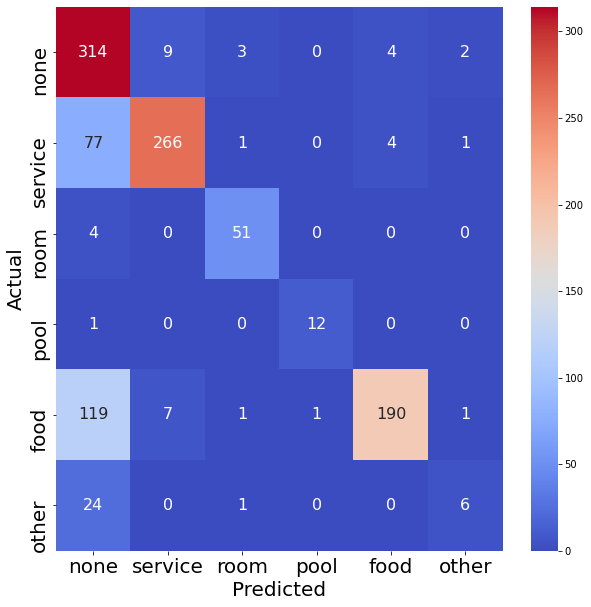

In [121]:
get_gs_info(gs_svc, full_train['sent_text_mod'], X_full)

As expected, many of the 'others' and 'food' category data was misclassified by the MBS Linear SVC and Random Forest models. This is due to the nature of the bag-of-words algorithms which accounts only for specific words and not the relationship between said specific words to each other, and how they are otherwise semantically related!

## Comparison of Marina Bay Sands and Fullerton Data

In [122]:
df['category']

0        pool
1       other
2        room
3        none
4        none
        ...  
3390     pool
3391     food
3392    other
3393     none
3394     none
Name: category, Length: 3380, dtype: object

In [123]:
df['category'].value_counts(normalize=True)

none       0.365680
room       0.160059
service    0.156213
pool       0.124852
other      0.097041
food       0.096154
Name: category, dtype: float64

In [124]:
df_cat = df.groupby(['category', 'sentiment']).count()

In [125]:
df_cat

rev_id  sent_text  sent_text_mod  category_mod  \
category sentiment                                                   
food     -1.0           33         33             33            33   
          0.0          105        105            105           105   
          1.0          187        187            187           187   
none     -1.0          104        104            104           104   
          0.0          623        623            623           623   
          1.0          509        509            509           509   
other    -1.0           29         29             29            29   
          0.0          100        100            100           100   
          1.0          199        199            199           199   
pool     -1.0           58         58             58            58   
          0.0           89         89             89            89   
          1.0          275        275            275           275   
room     -1.0           70         70             70            70   
          0.0          119        119            119           119   
          1.0          352        352            352           352   
service  -1.0          110        110            110           110   
          0.0           81         81             81            81   
          1.0          337        337            337           337   

                    sentiment_pred_vader  sentiment_pred_vader_token  \
category sentiment                                                     
food     -1.0                         33                          33   
          0.0                        105                         105   
          1.0                        187                         187   
none     -1.0                        104                         104   
          0.0                        623                         623   
          1.0                        509                         509   
other    -1.0                         29                          29   
          0.0                        100                         100   
          1.0                        199                         199   
pool     -1.0                         58                          58   
          0.0                         89                          89   
          1.0                        275                         275   
room     -1.0                         70                          70   
          0.0                        119                         119   
          1.0                        352                         352   
service  -1.0                        110                         110   
          0.0                         81                          81   
          1.0                        337                         337   

                    sentiment_pred_textblob  sentiment_pred_textblob_token  
category sentiment                                                          
food     -1.0                            33                             33  
          0.0                           105                            105  
          1.0                           187                            187  
none     -1.0                           104                            104  
          0.0                           623                            623  
          1.0                           509                            509  
other    -1.0                            29                             29  
          0.0                           100                            100  
          1.0                           199                            199  
pool     -1.0                            58                             58  
          0.0                            89                             89  
          1.0                           275                            275  
room     -1.0                            70                             70  
          0.0          

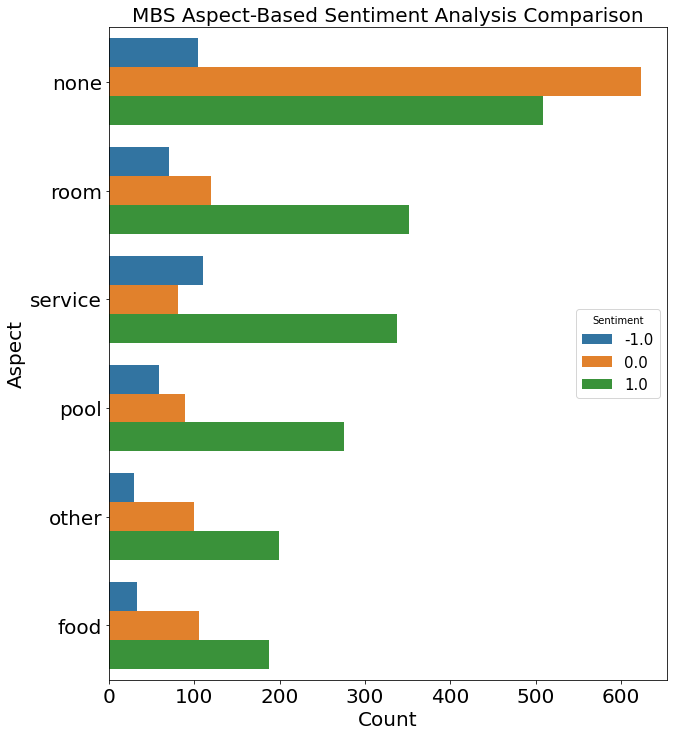

In [126]:
plt.figure(figsize=(10,12))
ax = sns.countplot(y="category", hue="sentiment", data=df, order = df['category'].value_counts().index)
ax.tick_params(labelsize=20)
ax.set_title("MBS Aspect-Based Sentiment Analysis Comparison",fontsize=20)
ax.set_xlabel("Count",fontsize=20)
ax.set_ylabel("Aspect",fontsize=20)
plt.legend(title='Sentiment', loc=7, prop={'size': 15})

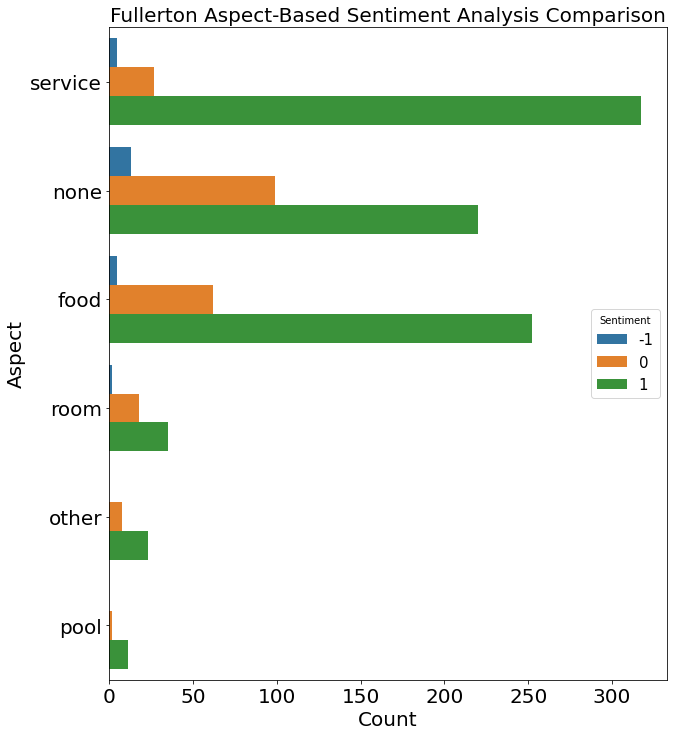

In [127]:
plt.figure(figsize=(10,12))
ax = sns.countplot(y="category", hue="sentiment", data = full_train, order = full_train['category'].value_counts().index)
ax.tick_params(labelsize=20)
ax.set_title("Fullerton Aspect-Based Sentiment Analysis Comparison",fontsize=20)
ax.set_xlabel("Count",fontsize=20)
ax.set_ylabel("Aspect",fontsize=20)
plt.legend(title='Sentiment', loc=7, prop={'size': 15})

In [128]:
full_df['category'].value_counts(normalize=True)

none       0.494045
service    0.204380
food       0.189397
room       0.078755
other      0.016904
pool       0.016519
Name: category, dtype: float64

From empirical observation, we see that Fullerton based data is a lot more overwhelmingly positive than MBS ones. This is especially obvious with regards to service, for which MBS data has a larger proportion of negative to neutral sentiment aspects.

## Conclusion



In this project, we attempted to create a model which was able to extract hotel aspects from online review data and assign a sentiment classification to each of them. Doing so using a bag-of-words model utilizing the TF-IDF Vectorizer and various multiclassification algorithms allowed us to obtain a highest Micro F1 score of around 0.79 from 3300+ rows of manually annotated data from the MBS.

This model is used to find aspects and predict aspects on another hotel, the Fullerton Hotel. Doing so gives us a F1 Micro score of around 0.76. Notably, the model often mis-predicted data which belonged to the 'food' category. This was due to the highly specific nature of the Fullerton's reviews when talking about food.

Sentiment analysis was done using pre-trained NLTK VADER and Textblob models, the former of which had a 0.75 accuracy. However, looking at the proportions of each sentiment category (negative, neutral and positive), each category was still very much in proportion to the annotated sentiment labels, showing that the pre-trained models did not simply predict only the majority class (positive) and was still doing a good job on minority classes. A classifier model trained only on data in the MBS train set performed poorly.

## Recommendations

This project has shown several limitations of a bag-of-word model in multiclass classification of hotel aspects. There were several problems identified which included:
1. Many sentences having more than one aspect, or a compounded comment ('the food and room were good but the service was not!'). We attempted to mitigate this by cutting sentences on the appearance of the word 'but' but the issues of aspects being compounded continues to persist. An algorithm able to handle multiclass classification will have to be found in future work.
2. The model could not handle semantic meanings of words well. For example, 'the cupcakes were good' could not be detected to be talking about food if 'cupcake' was not found in the train set and labeled to the category 'food'. A method of matching disparate nouns and verbs to categories would have to be found in future work.